The post is based on "Advice for applying Machine Learning" from Andrew Ng. The purpose of this notebook is to illustrate the ideas in an interactive way. Some of the recommendations are debatable. Take them as suggestions, not as strict rules.

In [1]:
import time
import numpy as np
import pandas as pd
np.random.seed(0)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,train_sizes=np.linspace(0.1,1.0,5)):
    plt.figure()
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=5,n_jobs=1,train_sizes=train_sizes)
    #返回模型的训练集大小，在训练集上的分数和测试集上的分数
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('score')
    plt.legend(loc='best')#best location
    plt.grid()#设置图标网格
    plt.ylim(ylim)
    plt.title(title)

In [4]:
from sklearn.datasets import make_classification
X,y = make_classification(1000,n_features=20,n_informative=2,n_redundant=2,n_classes=2,random_state=0)
#构建1000个样本的分类数据集

In [5]:
df = pd.DataFrame(np.hstack((X,y[:,None])))
#X,y需要是相同行矩阵
#a = np.array([[1],[2],[3]])
#b = np.array([[2],[3],[4]])
#np.hstack((a,b))
#array([[1, 2],
#      [2, 3],
#     [3, 4]])

In [25]:
X[:5,:3]

array([[-1.06377997,  0.67640868,  1.06935647],
       [ 0.0708476 , -1.69528125,  2.44944917],
       [ 0.94028404, -0.49214582,  0.67795602],
       [-0.29951677,  0.75988955,  0.18280267],
       [-2.63062675,  0.23103376,  0.04246253]])

In [22]:
y[:5]

array([0, 1, 1, 1, 0])

In [19]:
y[:,None][:5,:]

array([[0],
       [1],
       [1],
       [1],
       [0]])

In [26]:
df.rename(columns={20:'label'},inplace=True)

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0


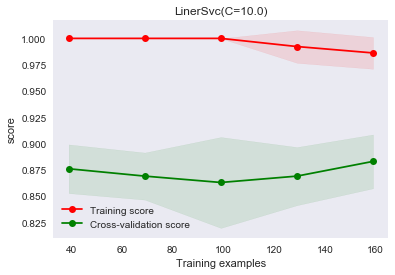

In [28]:
from sklearn.svm import LinearSVC
plot_learning_curve(LinearSVC(C=10.0),'LinerSvc(C=10.0)',X,y,train_sizes=np.linspace(0.05,0.2,5))
#train_sizes = 1000*0.05*4/5   test_sizes = 1000*0.05*1/5

there is a large gap between error on training and on validation data.
we are probably overfitting the training data!

### adressing overfitting
* increase number of training examples
* decrease the number of features


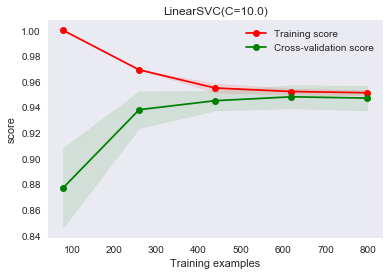

In [29]:
#increase number of training examples
plot_learning_curve(LinearSVC(C=10.0),'LinearSVC(C=10.0)',X,y,train_sizes=np.linspace(0.1,1.0,5))

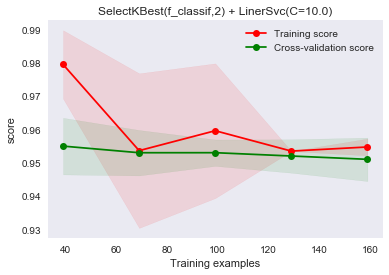

In [30]:
#decrease the number of features
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_classif
estimator = Pipeline([('fs',SelectKBest(f_classif,2)),
                     ('svc',LinearSVC(C=10.0))])
plot_learning_curve(estimator,'SelectKBest(f_classif,2) + LinerSvc(C=10.0)',X,y,train_sizes=np.linspace(0.05,0.2,5))

Chosen parameter on 100 datapoints: {'C': 0.01}


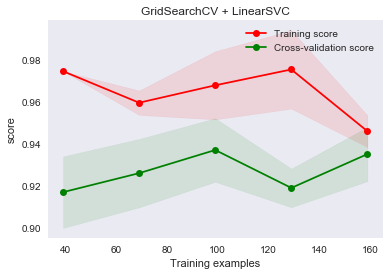

In [33]:
#increase regularization of classifier
from sklearn.model_selection import GridSearchCV
est = GridSearchCV(LinearSVC(),param_grid={'C':[0.001,0.01,0.1,1.0,10.0]})
plot_learning_curve(est,'GridSearchCV + LinearSVC',X,y,train_sizes = np.linspace(0.05,0.2,5))
print ('Chosen parameter on 100 datapoints: %s' % est.fit(X[:100],y[:100]).best_params_)

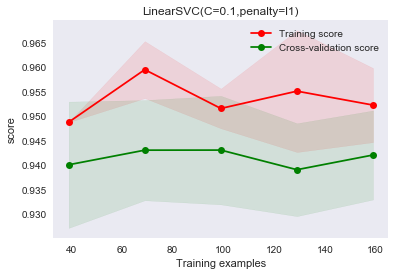

In [37]:
plot_learning_curve(LinearSVC(C=0.1,penalty='l1',dual=False),'LinearSVC(C=0.1,penalty=l1)',X,y,train_sizes=np.linspace(0.05,0.2,5))

In [38]:
#创建一个非线性可分数据集
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,random_state=2)

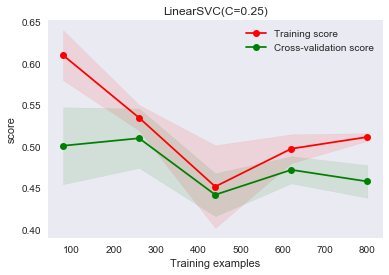

In [39]:
plot_learning_curve(LinearSVC(C=0.25),'LinearSVC(C=0.25)',X,y,train_sizes=np.linspace(0.1,1.0,5))

under_fitting

In [43]:
df = pd.DataFrame(np.hstack((X,y[:,None])),columns=[0,1,'class'])

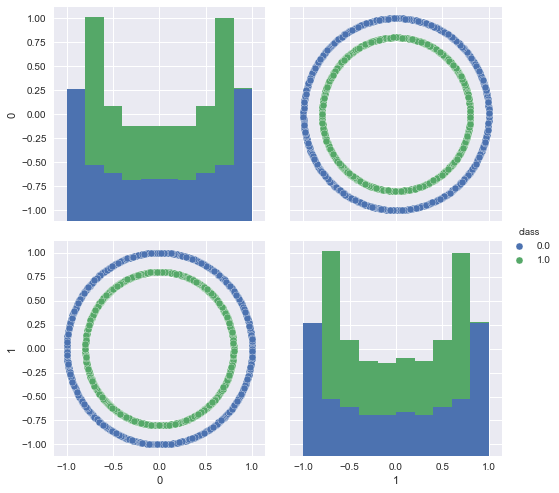

In [45]:
sns.pairplot(df,vars=[0,1],hue='class',size=3.5)

This data is clearly not linearly separable; more data or less features cannot help. Our model is wrong; thus the underfitting.

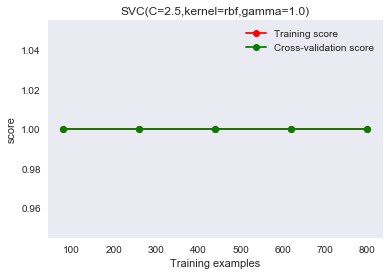

In [47]:
from sklearn.svm import SVC
plot_learning_curve(SVC(C=2.5,kernel='rbf',gamma=1.0),'SVC(C=2.5,kernel=''rbf'',gamma=1.0)',X,y,train_sizes=np.linspace(0.1,1.0,5))

 On many actual problems, the collection, organisation, and preprocessing of the data are of uttermost importance.